Registro de visualizaciones

In [1]:
import pandas as pd
df_train = pd.read_csv(r'C:\Users\MegaTecnologia\Desktop\DesafioTelecom\Data\train.csv')

In [2]:
df_train.head(10)

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume
0,0,90627,STATIONARY,18332.0,2021-02-18 22:52:00.0,2021-02-18 23:35:00.0,0
1,0,90627,STATIONARY,24727.0,2021-03-24 23:17:00.0,2021-03-25 00:01:00.0,0
2,1,3387,STB,895.0,2021-03-15 10:05:00.0,2021-03-15 10:23:00.0,0
3,1,3387,STB,895.0,2021-03-15 10:23:00.0,2021-03-15 11:18:00.0,1
4,1,3387,STB,26062.0,2021-03-16 09:24:00.0,2021-03-16 09:44:00.0,0
5,1,3387,STB,26062.0,2021-03-16 09:44:00.0,2021-03-16 09:47:00.0,0
6,2,3388,STB,30840.0,2021-01-01 02:22:00.0,2021-01-01 02:34:00.0,1
7,2,3388,STB,30840.0,2021-01-02 01:02:00.0,2021-01-02 01:08:00.0,1
8,2,3388,STB,13180.0,2021-01-02 01:08:00.0,2021-01-02 01:21:00.0,0
9,2,3388,STB,13180.0,2021-01-04 01:32:00.0,2021-01-04 01:35:00.0,1


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657801 entries, 0 to 3657800
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  int64  
 1   account_id   int64  
 2   device_type  object 
 3   asset_id     float64
 4   tunein       object 
 5   tuneout      object 
 6   resume       int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 195.3+ MB


In [4]:
#Vemos si hay nulls que nos vayan a romper alguna predicción
df_train.isnull().values.any()

True

In [5]:
#Vemos dónde están y cuántos son
df_train.index[df_train.isnull().any(axis=1)]

Int64Index([ 106890,  120175,  146642,  219038,  249196,  484894,  528885,
             666823,  726181,  737730,  737731,  737732,  863794,  931142,
            1020856, 1062022, 1238162, 1321333, 1652989, 1668627, 1785644,
            1854385, 1860974, 2038544, 2038545, 2038546, 2038547, 2038548,
            2038549, 2038550, 2038551, 2200219, 2348268, 2731969, 2740223,
            2740225, 2982344, 2993856, 3025633, 3025634, 3025635, 3105229,
            3144002, 3186447, 3254238, 3254239, 3352578, 3490722, 3572923,
            3611436, 3635973],
           dtype='int64')

In [6]:
df_train.loc[3254239]

customer_id                    97749
account_id                     14892
device_type                      NaN
asset_id                     30357.0
tunein         2021-01-16 14:57:00.0
tuneout        2021-01-16 15:03:00.0
resume                             0
Name: 3254239, dtype: object

In [7]:
#Como los nulos están siempre en el asset y no me sirve un registro sin asset, los elimino
df_train.dropna(inplace=True)
df_train.isnull().values.any()

False

In [8]:
#Como asset es un id, voy a llevarlo a tipo entero
df_train['asset_id'] = df_train['asset_id'].astype('int32')

<AxesSubplot:xlabel='asset_id', ylabel='count'>

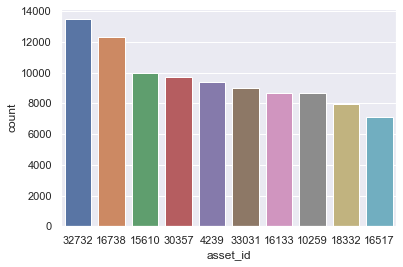

In [9]:
#Vemos los 10 ítems más vistos
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.countplot(x='asset_id', data=df_train,
             order=df_train.asset_id.value_counts().iloc[:10].index)

<AxesSubplot:xlabel='device_type', ylabel='count'>

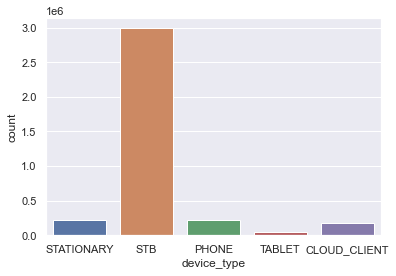

In [10]:
#Vemos los dispositivos más usados
sns.countplot(x='device_type', data=df_train)

Vemos que el decodificador es el más usado por mucho

In [11]:
df_train

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume
0,0,90627,STATIONARY,18332,2021-02-18 22:52:00.0,2021-02-18 23:35:00.0,0
1,0,90627,STATIONARY,24727,2021-03-24 23:17:00.0,2021-03-25 00:01:00.0,0
2,1,3387,STB,895,2021-03-15 10:05:00.0,2021-03-15 10:23:00.0,0
3,1,3387,STB,895,2021-03-15 10:23:00.0,2021-03-15 11:18:00.0,1
4,1,3387,STB,26062,2021-03-16 09:24:00.0,2021-03-16 09:44:00.0,0
...,...,...,...,...,...,...,...
3657796,112339,3386,STB,330,2021-03-31 22:10:00.0,2021-03-31 22:22:00.0,0
3657797,112339,3386,STB,9931,2021-03-31 22:22:00.0,2021-03-31 22:34:00.0,1
3657798,112339,3386,STB,29929,2021-03-31 22:34:00.0,2021-03-31 22:46:00.0,0
3657799,112339,3386,STB,29929,2021-03-31 23:09:00.0,2021-03-31 23:13:00.0,1


El objetivo de esta parte sería delimitar el target. Vamos a considerar que si el usuario vio más de la mitad del contenido, le gustó.

In [12]:
#Cast to timestamp

df_train['tunein']= pd.to_datetime(df_train['tunein'], format='%Y-%m-%d %H:%M:%S')
df_train['tuneout']= pd.to_datetime(df_train['tuneout'], format='%Y-%m-%d %H:%M:%S')

In [13]:
df_train['minVisualizados'] = df_train['tuneout']-df_train['tunein']

In [16]:
df_train['minVisualizados']= df_train['minVisualizados'].dt.total_seconds().div(60).astype(int)

In [18]:
dfMeta = pd.read_csv(r'C:\Users\MegaTecnologia\Desktop\DesafioTelecom\Data\metadata.csv',
                      sep=";")

In [19]:
dfMetaMinutos = dfMeta[['asset_id', 'run_time_min']]

In [20]:
#Cast run_time_min to compare same datatype columns
dfMetaMinutos = dfMetaMinutos.astype({'run_time_min':'int'})

In [23]:
#Merge the two DF in one 
result =pd.merge(df_train,dfMetaMinutos, how='inner',on ='asset_id')
result

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume,minVisualizados,run_time_min
0,0,90627,STATIONARY,18332,2021-02-18 22:52:00,2021-02-18 23:35:00,0,43,43
1,3,3389,CLOUD_CLIENT,18332,2021-02-27 16:25:00,2021-02-27 17:05:00,0,40,43
2,11,3395,STATIONARY,18332,2021-02-24 17:24:00,2021-02-24 18:10:00,0,46,43
3,13,26042,PHONE,18332,2021-02-24 21:56:00,2021-02-24 22:44:00,0,48,43
4,35,26060,STB,18332,2021-02-19 15:10:00,2021-02-19 15:15:00,1,5,43
...,...,...,...,...,...,...,...,...,...
3657745,111822,25640,STB,15863,2021-03-16 00:25:00,2021-03-16 00:28:00,1,3,110
3657746,111822,25640,STB,15598,2021-03-26 01:11:00,2021-03-26 02:22:00,1,71,107
3657747,111822,25640,STB,22513,2021-03-27 03:56:00,2021-03-27 05:05:00,1,69,107
3657748,111988,25777,PHONE,24720,2021-02-05 11:54:00,2021-02-05 11:57:00,0,3,89


In [24]:
result['target'] = ((result.minVisualizados > result.run_time_min*0.5)*1 )

In [25]:
#Comprobamos el balanceo de las clases
result.target.value_counts()

1    1991920
0    1665830
Name: target, dtype: int64

In [26]:
result.to_csv('train_w_target.csv')